In [1]:
import pandas as pd
import category_encoders as ce
from sklearn.datasets import load_wine
import matplotlib.pyplot as plt
import seaborn as sns



Original unique categories in 'wine_class':
[0 1 2]

Value counts of original categories:
wine_class
1    71
0    59
2    48
Name: count, dtype: int64
--------------------------------------------------

Head of the DataFrame after Binary Encoding:
   wine_class  wine_class_0  wine_class_1
0           0             0             1
1           0             0             1
2           0             0             1
3           0             0             1
4           0             0             1
5           0             0             1
6           0             0             1
7           0             0             1
8           0             0             1
9           0             0             1
--------------------------------------------------

Full mapping of original categories to binary representation:
   wine_class  wine_class_0  wine_class_1
0           0             0             1
1           1             1             0
2           2             1             1
--------

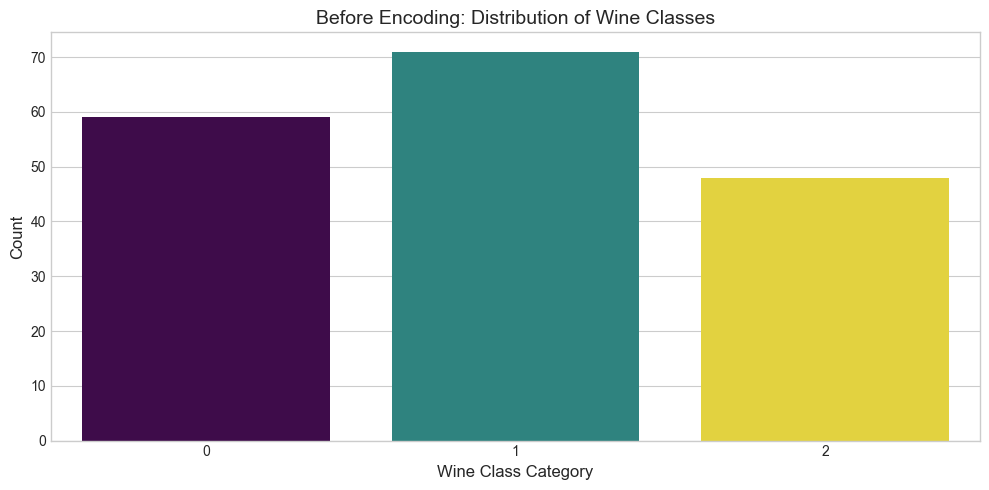

In [2]:
# --- When to Use Binary Encoding ---
# Binary encoding is a feature engineering technique used to transform categorical
# variables into a numerical format that machine learning models can understand.
#
# When to use it:
# 1. High Cardinality Features: It's particularly effective for categorical
#    features with a large number of unique values (e.g., zip codes, city names).
# 2. Reducing Dimensionality: Compared to One-Hot Encoding, which creates a new
#    column for each category, Binary Encoding creates far fewer columns,
#    preventing the "curse of dimensionality".
#
# How it works:
# 1. Categories are first converted to integers (like Ordinal Encoding).
# 2. These integers are then converted into their binary representation.
# 3. Each digit in the binary number gets its own column.
#
# Requirements:
# - The data must be categorical.
# - It does not assume any order (ordinality) in the categories.

# 1. FIND AND LOAD A RELEVANT DATASET FROM SCIKIT-LEARN
# We'll use the 'wine' dataset from scikit-learn. The 'target' column,
# which represents different classes of wine, is a perfect candidate for encoding.
wine_data = load_wine()
df = pd.DataFrame(data=wine_data.data, columns=wine_data.feature_names)
# For demonstration, we'll use the 'target' column as our categorical feature.
# In scikit-learn datasets, the target is often separate.
df['wine_class'] = wine_data.target

# Let's see the original categories
print("Original unique categories in 'wine_class':")
print(df['wine_class'].unique())
print("\nValue counts of original categories:")
print(df['wine_class'].value_counts())
print("-" * 50)


# 2. SELECT A FEATURE TO WORK WITH
# We will apply binary encoding to the 'wine_class' column.
feature_to_encode = 'wine_class'

# 3. APPLY THE BINARY ENCODING
# We initialize the BinaryEncoder from the category_encoders library.
# We specify the column we want to encode in the `cols` parameter.
binary_encoder = ce.BinaryEncoder(cols=[feature_to_encode])

# Fit the encoder to the data and transform the column.
# The `fit_transform` method learns the categories and then converts them.
df_encoded = binary_encoder.fit_transform(df)


# 4. SHOW THE RESULT
# The encoder replaces the original 'wine_class' column with new binary columns.
# Let's rename the new columns for clarity.
new_column_names = {col: f"{feature_to_encode}_{col.split('_')[-1]}" for col in df_encoded.columns if col.startswith(f"{feature_to_encode}_")}
df_encoded.rename(columns=new_column_names, inplace=True)

# For clarity, let's join the original column back to see the mapping.
# We'll create a final DataFrame for comparison.
final_df = df.join(df_encoded.filter(like=feature_to_encode))


print("\nHead of the DataFrame after Binary Encoding:")
# Displaying the original and the new encoded columns side-by-side
print(final_df[[feature_to_encode] + list(new_column_names.values())].head(10))
print("-" * 50)

# Let's see the full mapping for all unique values
print("\nFull mapping of original categories to binary representation:")
print(
    final_df[[feature_to_encode] + list(new_column_names.values())]
    .drop_duplicates()
    .sort_values(by=feature_to_encode)
    .reset_index(drop=True)
)
print("-" * 50)


# 5. VISUALIZATION
# A traditional before-and-after histogram (like for log transform) isn't
# directly applicable to binary encoding. The goal isn't to change the
# distribution of a single variable, but to represent categories numerically.
# A good "visualization" is to show the value counts before and the resulting
# table after, which we've printed above.

# However, we can create a plot to visualize the original distribution of categories.
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(10, 5))

sns.countplot(x=df[feature_to_encode], ax=ax, palette='viridis', hue=df[feature_to_encode], legend=False)
ax.set_title('Before Encoding: Distribution of Wine Classes', fontsize=14)
ax.set_xlabel('Wine Class Category', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
plt.tight_layout()
plt.show()

# The "after" visualization is effectively the table printed above, which shows
# how each category is now represented by a vector of binary digits (0s and 1s).
